##### Perceptron: It is one of the simpliest ANN architectures
 There are two types of perceptron
1. TLU(Threshold logic unit)
2. LTU(Linear threshold unit) 

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)","petal width (cm)"]].values
y = (iris.target == 0)

per_clf = Perceptron()
per_clf.fit(X,y)

X_new = [[2,0.5],[3,1]]
y_pred =  per_clf.predict(X_new)

In [3]:
y_pred

array([False, False])

There are activations functions using which we can check or understand the errosr made by each layer.

Diffrent Activation functions are:
1. Heaviside
2. ReLU
3. Sigmoid
4. Tanh

### Regression MLP

MLP can be used for regression purpose.

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [6]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
pipeline = make_pipeline(StandardScaler(),mlp_reg)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid,y_pred,squared=False)
rmse
# Here no activation function is used, so it free to output any value

0.505332665796866

if we want to gurantee that output is always positive, then we should use ReLU activation function or softplus activation function. softplus is close to zero when z is negative and close to z when z is positive.
And if i want to guarntee that value should within a range then use sigmoid function.

1. for lot of outliers use MAE(mean absoulute error)
2. Huber loss = mean squared error + mean absolute error
3. MLPRegressor only supports MSE
4. MSE, or Huber if outliers

### Classification MLPs

### Implementing MLP with Keras

Using keras to load the dataset

In [7]:
import tensorflow as tf

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_train.dtype

dtype('uint8')

In [11]:
X_train,X_valid,X_test = X_train/255.,X_valid/255.,X_test/255

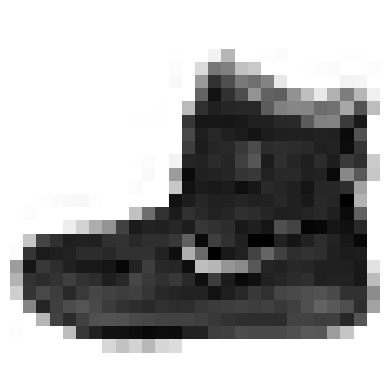

In [12]:
# extra code
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
class_names[y_train[0]]

'Ankle boot'

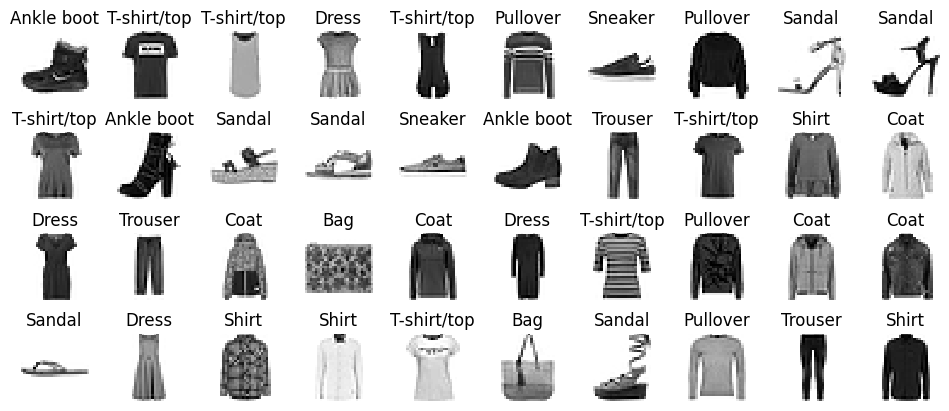

In [15]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)


plt.show()

Creating the model using the sequential API

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation="relu"), # 300 nuurons
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

C:\Users\acer\ML_PATH\my_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer('dense') is hidden1

True

In [21]:
weights,biases = hidden1.get_weights()

In [22]:
weights

array([[-0.06198386,  0.05754383, -0.03547434, ...,  0.03490308,
         0.05874056, -0.03211869],
       [ 0.00972121,  0.00419571,  0.05504276, ..., -0.06859955,
         0.05150466,  0.00777358],
       [-0.06918779, -0.02917139,  0.0215403 , ..., -0.00935617,
        -0.00702708,  0.01979319],
       ...,
       [-0.03139898, -0.02881259,  0.02339369, ..., -0.05189317,
         0.02225412, -0.00188965],
       [-0.04807038,  0.04537395,  0.03437307, ..., -0.07152284,
         0.056833  , -0.01021826],
       [-0.05842634,  0.0022841 ,  0.07417423, ..., -0.06961661,
        -0.00141695,  0.01101652]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

if we don't want to specify the input shape then it is ok, keras will simplify it and you have to wait until it knows the shape of the input.

#### Compiling the model

In [26]:
model.compile(loss="sparse_categorical_crossentropy", # using loss="sparse_categorical_crossentropy" is equivalent to using loss=tf.keras.losses.sparse_categorical_crossentropy 
             optimizer="sgd",
             metrics=["accuracy"])

Here we have sparse labels(for each instance, there is just a target class index, from 0 to 9), that's the reason we are using loss="sparse_categorical_crossentropy".if instead we had one target probability per class for each instance(such as one-hot vectors, eg[0,0,0,1,0,0,0] to represent class 3), then we need to use the categorical_crossentropy loss instead. if we have binary or multilabel binay classification, then we should use "sigmoid" activation function and in output layer instead of the "softmax" activation function, and we would use "binary_crossentropy" loss.

#### Training and evaluating the model

In [27]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6811 - loss: 0.9797 - val_accuracy: 0.8028 - val_loss: 0.5432
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8264 - loss: 0.5050 - val_accuracy: 0.8364 - val_loss: 0.4532
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8431 - loss: 0.4517 - val_accuracy: 0.8430 - val_loss: 0.4258
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8529 - loss: 0.4220 - val_accuracy: 0.8496 - val_loss: 0.4153
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8607 - loss: 0.4019 - val_accuracy: 0.8612 - val_loss: 0.3992
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8649 - loss: 0.3862 - val_accuracy: 0.8594 - val_loss: 0.3752
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8703 - loss: 0.3725 - val_accuracy: 0.8684 - val_loss: 0.3646
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8731 - loss: 0.3560

In [28]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [29]:
history.history

{'accuracy': [0.762363612651825,
  0.8314363360404968,
  0.8467636108398438,
  0.8548181653022766,
  0.8621090650558472,
  0.8677999973297119,
  0.8714908957481384,
  0.8744363784790039,
  0.878000020980835,
  0.8816545605659485,
  0.8834545612335205,
  0.8867999911308289,
  0.8903090953826904,
  0.8907999992370605,
  0.8946727514266968,
  0.895763635635376,
  0.8965636491775513,
  0.8996909260749817,
  0.9004727005958557,
  0.9027818441390991,
  0.9057636260986328,
  0.9063454270362854,
  0.9082000255584717,
  0.9093818068504333,
  0.9117090702056885,
  0.9127272963523865,
  0.9146727323532104,
  0.9157817959785461,
  0.9172545671463013,
  0.9198181629180908],
 'loss': [0.7119119167327881,
  0.4875727891921997,
  0.44249773025512695,
  0.41551336646080017,
  0.39575299620628357,
  0.38030678033828735,
  0.36696574091911316,
  0.35561221837997437,
  0.3444352149963379,
  0.33469104766845703,
  0.3263772130012512,
  0.3179376721382141,
  0.31094011664390564,
  0.30383068323135376,
  0.2

In [30]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

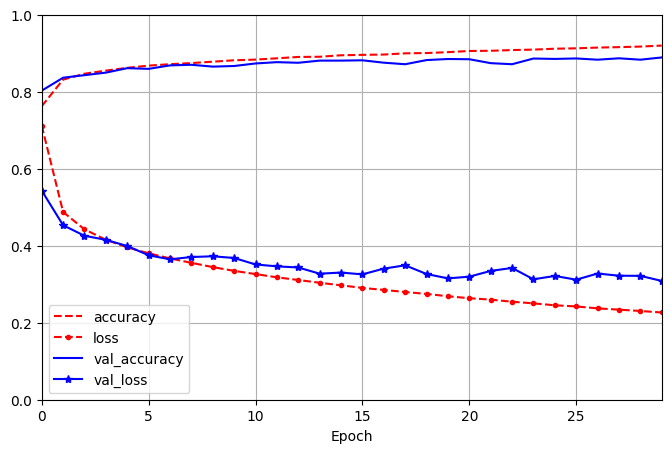

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",style=["r--","r--.","b-","b-*"])
plt.show()

In [33]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8816 - loss: 0.3329


[0.3339683413505554, 0.8828999996185303]

#### Using the model to make predictions

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
import numpy as np
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [37]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

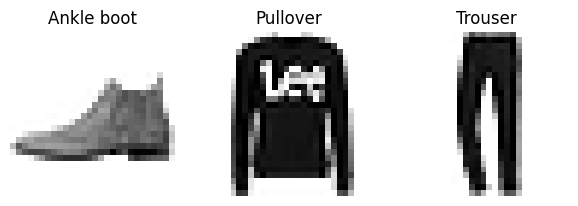

In [38]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

#### Building sequential MLP using the sequential API

Using the california housing problem. Since we are only want one single value and it uses no activation function the loss function is mean squared error, the metric is the RMSE and using adam optimizer like scikitlearn MLPRegressor. Instead of faltten layer using Normalization as first layer.

In [39]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [40]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train,y_train,epochs=20,
                   validation_data=(X_valid,y_valid))
mse_test,rmse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


C:\Users\acer\ML_PATH\my_env\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.2214 - loss: 1.5966 - val_RootMeanSquaredError: 0.6266 - val_loss: 0.3926
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6335 - loss: 0.4018 - val_RootMeanSquaredError: 0.6156 - val_loss: 0.3789
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6094 - loss: 0.3716 - val_RootMeanSquaredError: 0.6112 - val_loss: 0.3736
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5968 - loss: 0.3563 - val_RootMeanSquaredError: 0.5980 - val_loss: 0.3576
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5880 - loss: 0.3459 - val_RootMeanSquaredError: 0.5904 - val_loss: 0.3485
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5802 - loss: 0.3368 - val_RootMeanSquaredError: 0.6746 - val_loss: 0.4551
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5729 - loss: 0.3283 -

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

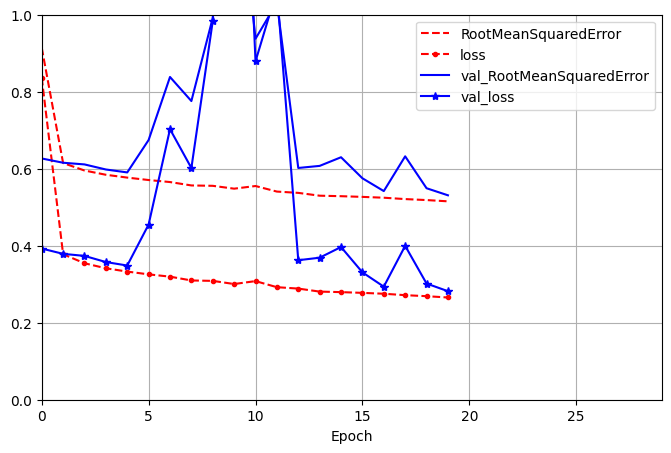

In [42]:
pd.DataFrame(history.history).plot(figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",style=["r--","r--.","b-","b-*"])
plt.show()

### Building complex models using fuctional API 

In [43]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30,activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30,activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_],outputs=[output])

Handling multiple inputs. How to send multiple inputs through wide and deep path

In [44]:
input_wide = tf.keras.layers.Input(shape=[5]) # Feature 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # Feature 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30,activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30,activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output])

instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_wide,X_train_deep), one per input.

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.4433 - loss: 2.1704 - val_RootMeanSquaredError: 1.0193 - val_loss: 1.0391
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7495 - loss: 0.5624 - val_RootMeanSquaredError: 1.3008 - val_loss: 1.6921
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6865 - loss: 0.4716 - val_RootMeanSquaredError: 0.6298 - val_loss: 0.3967
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6592 - loss: 0.4348 - val_RootMeanSquaredError: 1.4455 - val_loss: 2.0894
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6472 - loss: 0.4192 - val_RootMeanSquaredError: 1.6235 - val_loss: 2.6357
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6380 - loss: 0.4071 - val_RootMeanSquaredError: 2.1735 - val_loss: 4.7241
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6364 - los

#### For multiple outputs

In [46]:
input_wide = tf.keras.layers.Input(shape=[5]) # Feature 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # Feature 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30,activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30,activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output,aux_output])

In [47]:
# Each output needs its own loss function.Therefore, when we compile the model, we should pass a list of losses.
# If we pass a single loss, keras will assume that the same loss must be used for all outputs.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse","mse"),loss_weights=(0.9,0.1),optimizer=optimizer,metrics=["RootMeanSquaredError","RootMeanSquaredError"])

instead of passing tuple loss=("mse","mse") we can pass dictonary loss={"output":"mse","aux_output":"mse"}

In [48]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=20,
                   validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - dense_15_RootMeanSquaredError: 1.5872 - dense_15_loss: 2.3698 - dense_16_RootMeanSquaredError: 1.9165 - dense_16_loss: 0.3758 - loss: 2.7457 - val_dense_15_RootMeanSquaredError: 1.1789 - val_dense_15_loss: 1.2504 - val_dense_16_RootMeanSquaredError: 1.8250 - val_dense_16_loss: 0.3329 - val_loss: 1.5839
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_15_RootMeanSquaredError: 0.7459 - dense_15_loss: 0.5012 - dense_16_RootMeanSquaredError: 0.9402 - dense_16_loss: 0.0886 - loss: 0.5898 - val_dense_15_RootMeanSquaredError: 0.7079 - val_dense_15_loss: 0.4509 - val_dense_16_RootMeanSquaredError: 1.0304 - val_dense_16_loss: 0.1061 - val_loss: 0.5572
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_15_RootMeanSquaredError: 0.6785 - dense_15_loss: 0.4146 - dense_16_RootMeanSquaredError: 0.7711 - dense_16_loss: 0.0595 - loss: 0.4741 - val_dense_15_RootMeanSquaredError: 0.6180 - val_dense_15_loss: 0.3436 - val_dense_16_Ro

In [50]:
eval_results = model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
weighted_sum_of_losses,main_loss,aux_loss,main_rmse,aux_rmse=eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_15_RootMeanSquaredError: 0.5771 - dense_15_loss: 0.2999 - dense_16_RootMeanSquaredError: 0.6320 - dense_16_loss: 0.0400 - loss: 0.3398


In [51]:
y_pred_main,y_pred_aux = model.predict((X_new_wide,X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [53]:
y_pred_tuple = model.predict((X_new_wide,X_new_deep))
y_pred = dict(zip(model.output_names,y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [54]:
y_pred

{'dense_15': array([[0.32203078],
        [1.166763  ],
        [3.5270858 ]], dtype=float32),
 'dense_16': array([[0.17696907],
        [1.0766548 ],
        [3.1211343 ]], dtype=float32)}

### Using the Sequential API to build dynamic models

In [65]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

**Warning**: as explained above, Keras now requires one loss and one metric per output, so I replaced `loss="mse"` with `loss=["mse", "mse"]` and I also replaced `metrics=["RootMeanSquaredError"]` with `metrics=["RootMeanSquaredError", "RootMeanSquaredError"]` in the code below.

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer=optimizer,
             metrics=["RootMeanSquaredError","RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide,X_train_deep),(y_train,y_train),epochs=20,
                   validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)))
eval_result = model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
y_pred_main,y_pred_aux = model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - RootMeanSquaredError: 0.5742 - RootMeanSquaredError_1: 0.6240 - loss: 0.3357 - mse_loss: 0.0389 - val_RootMeanSquaredError: 0.7010 - val_RootMeanSquaredError_1: 0.7153 - val_loss: 0.4934 - val_mse_loss: 0.0512
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5719 - RootMeanSquaredError_1: 0.6208 - loss: 0.3329 - mse_loss: 0.0386 - val_RootMeanSquaredError: 0.9232 - val_RootMeanSquaredError_1: 0.8290 - val_loss: 0.8358 - val_mse_loss: 0.0687
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5706 - RootMeanSquaredError_1: 0.6186 - loss: 0.3313 - mse_loss: 0.0383 - val_RootMeanSquaredError: 0.6981 - val_RootMeanSquaredError_1: 0.7359 - val_loss: 0.4927 - val_mse_loss: 0.0542
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5696 - RootMeanSquaredError_1: 0.6167 - loss: 0.3301 - mse_loss: 0.0380 - val_RootMeanSquaredError: 1.1033 - val_RootMeanSquaredEr

### **Saving and Restoring Model**

**Warning**: Keras now recommends using the `.keras` format to save models, and the `h5` format for weights. Therefore I have updated the code in this section to first show what you need to change if you still want to use TensorFlow's `SavedModel` format, and then how you can use the recommended formats.

In [70]:
# extra code – delete the directory, in case it already exists

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

** **bold text**Warning**: Keras's `model.save()` method no longer supports TensorFlow's `SavedModel` format. However, you can still export models to the `SavedModel` format using `model.export()` like this:

*   List item
*   List item



In [71]:
model.export("my_keras_model")

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


Saved artifact at 'my_keras_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): Tuple[TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)]
Output Type:
  Tuple[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  2260653927664: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  2261289033168: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  2261290321696: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  2261290042112: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  2261288661088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2261289025952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2261288660384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2261289031408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2261285603984: TensorSpec(shape=(), dtype=tf.resou

**Warning**: Keras now requires the saved weights to have the `.weights.h5` extension. There are no longer saved using the `SavedModel` format.

In [85]:
model.save_weights("my_weights.weights.h5")

### Using Callbacks

In [102]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit((X_train_wide,X_train_deep),(y_train,y_train),epochs=10,
                    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),callbacks=[checkpoint_cb])


Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5364 - RootMeanSquaredError_1: 0.5743 - loss: 0.2920 - mse_loss: 0.0330 - val_RootMeanSquaredError: 0.7507 - val_RootMeanSquaredError_1: 0.8143 - val_loss: 0.5735 - val_mse_loss: 0.0663
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5364 - RootMeanSquaredError_1: 0.5743 - loss: 0.2920 - mse_loss: 0.0330 - val_RootMeanSquaredError: 0.5696 - val_RootMeanSquaredError_1: 0.5857 - val_loss: 0.3263 - val_mse_loss: 0.0343
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5360 - RootMeanSquaredError_1: 0.5734 - loss: 0.2915 - mse_loss: 0.0329 - val_RootMeanSquaredError: 0.8223 - val_RootMeanSquaredError_1: 1.0172 - val_loss: 0.7121 - val_mse_loss: 0.1034
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.5358 - RootMeanSquaredError_1: 0.5744 - loss: 0.2915 - mse_loss: 0.0330 - val_RootMeanSquaredError: 0.6467 - val_RootMeanSquaredEr

#### if we use a validation set during training, we can set save_best_only = True when creating the ModelCheckpoint.
#### In this case it will save the model when its performance on the validation set is the best so far.
#### This way simply restore the last saved model
#### Another way to use the EarlyStopping 
#### set restore_best_weights = True will rollback to the best model at the end of training.

In [103]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=100,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5347 - RootMeanSquaredError_1: 0.5727 - loss: 0.2903 - mse_loss: 0.0328 - val_RootMeanSquaredError: 0.5893 - val_RootMeanSquaredError_1: 0.6262 - val_loss: 0.3517 - val_mse_loss: 0.0392
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5331 - RootMeanSquaredError_1: 0.5716 - loss: 0.2886 - mse_loss: 0.0327 - val_RootMeanSquaredError: 0.5540 - val_RootMeanSquaredError_1: 0.6322 - val_loss: 0.3162 - val_mse_loss: 0.0400
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5337 - RootMeanSquaredError_1: 0.5712 - loss: 0.2891 - mse_loss: 0.0326 - val_RootMeanSquaredError: 0.6653 - val_RootMeanSquaredError_1: 0.7564 - val_loss: 0.4555 - val_mse_loss: 0.0572
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5329 - RootMeanSquaredError_1: 0.5716 - loss: 0.2883 - mse_loss: 0.0327 - val_RootMeanSquaredError: 0.5821 - val_RootMeanSquar

**Here the early stoping came and stop the model to train futher as error is not decreasing.**

### Using TensorBoard for Visualization

In [114]:
shutil.rmtree("my_logs", ignore_errors=True)

In [115]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [116]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [117]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.8215 - loss: 3.4286 - val_RootMeanSquaredError: 1.1467 - val_loss: 1.3150
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8480 - loss: 0.7202 - val_RootMeanSquaredError: 0.7540 - val_loss: 0.5685
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7738 - loss: 0.5996 - val_RootMeanSquaredError: 0.7070 - val_loss: 0.4998
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7454 - loss: 0.5564 - val_RootMeanSquaredError: 0.6839 - val_loss: 0.4677
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7235 - loss: 0.5243 - val_RootMeanSquaredError: 0.6667 - val_loss: 0.4445
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7063 - loss: 0.4996 - val_RootMeanSquaredError: 0.6538 - val_loss: 0.4274
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6929 - los

In [118]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print(" "*(len(path.parts)-1)+path.parts[-1])

my_logs
 run_2025_03_08_11_15_18
  plugins
   profile
    2025_03_08_05_45_27
     MYLAPI.xplane.pb
  train
   events.out.tfevents.1741412726.MYLAPI.16376.4.v2
  validation
   events.out.tfevents.1741412727.MYLAPI.16376.5.v2


In [119]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

In [121]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1,1000+1):
        tf.summary.scalar("my_scaler",np.sin(step/10),step=step)
        data = (np.random.randn(100)+2) * step/100
        tf.summary.histogram("my_hist",data,buckets=50,step=step)
        images = np.random.rand(2,32,32,3)*step/100
        tf.summary.image("my_images",images,step=step)
        texts = ["The step is" +str(step),"Its square is "+str(step**2)]
        tf.summary.text("my_text",texts,step=step)
        since_wave = tf.math.sin(tf.range(12000)/48000*2*np.pi*step)
        audio = tf.reshape(tf.cast(since_wave,tf.float32),[1,-1,1])
        tf.summary.audio("my_audio",audio,sample_rate=48000,step=step)

### **Fine-Tuning Neural Network Hyperparameters**

In [125]:
! pip install keras_tuner


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [133]:
import keras_tuner as kt

In [145]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden",min_value=0,max_value=8,default=2)
    n_neurons = hp.Int("n_neurons",min_value=16,max_value=256)
    learning_rate = hp.Float("learning_rate",min_value=1e-4,max_value=1e-2,sampling="log")

    optimizer = hp.Choice("optimizer",values=["sgd","adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons,activation="relu"))

    model.add(tf.keras.layers.Dense(10,activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
    return model

In [143]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [146]:
random_search_tuner = kt.RandomSearch(
    build_model,objective = "val_accuracy",max_trials=5,overwrite=True,
    directory="my_fashion_mnist",project_name="my_rnd_search",seed=42)
random_search_tuner.search(X_train,y_train,epochs=10,validation_data=[X_valid,y_valid])

Trial 5 Complete [00h 00m 43s]
val_accuracy: 0.823199987411499

Best val_accuracy So Far: 0.8539999723434448
Total elapsed time: 00h 03m 55s


In [147]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [171]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
for i in range(len(top3_params)):
    print(top3_params[i].values)

{'n_hidden': 8, 'n_neurons': 37, 'learning_rate': 0.008547485565344062, 'optimizer': 'sgd'}
{'n_hidden': 7, 'n_neurons': 100, 'learning_rate': 0.0012482904754698163, 'optimizer': 'sgd'}
{'n_hidden': 5, 'n_neurons': 70, 'learning_rate': 0.00041268008323824807, 'optimizer': 'sgd'}


In [172]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8539999723434448


In [173]:
best_trial.metrics.get_last_value("val_accuracy")

0.8539999723434448

In [175]:
best_model.fit(X_train_full,y_train_full,epochs=10)
test_loss,test_accuracy = best_model.evaluate(X_test,y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8628 - loss: 0.3765
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8652 - loss: 0.3647
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8681 - loss: 0.3564
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8704 - loss: 0.3526
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8715 - loss: 0.3436
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8726 - loss: 0.3397
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8745 - loss: 0.3346
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8762 - loss: 0.3339
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8781 - loss: 0.3293
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8790 - loss: 0.3234
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8459 - loss: 0.4299


In [176]:
test_loss,test_accuracy

(0.4321381449699402, 0.8478000164031982)

In [183]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self,hp):
        return build_model(hp)
    def fit(self,hp,model,X,y,**kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X,y,**kwargs)

In [184]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(),objective="val_accuracy",seed=42,
    max_epochs=10,factor=3,hyperband_iterations=2,
    overwrite=True,directory="my_fashion_mnist",project_name="hyperband")

In [192]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),
                      callbacks=[early_stopping_cb,tensorboard_cb])

In [193]:
%tensorboard --logdir {root_logdir}

Reusing TensorBoard on port 6009 (pid 10316), started 0:00:00 ago. (Use '!kill 10316' to kill it.)

In [188]:
%load_ext tensorboard
%tensorboard --logdir=./my_fashion_mnist/hyperband/tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
